TRABAJO PRACTICO 1
Lucas Burdman 104310

In [3]:
# LIBRERIAS
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

In [134]:
# DATOS DE ENTRADA Y SALIDA
# Datos de entradas y salidas para AND de 2 entradas
inputs2_AND = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
outputs2_AND = np.array([1, -1, -1, -1])
# Datos de entradas y salidas para AND de 4 entradas
inputs4_AND = np.array([[1, 1, 1, 1], [1, 1, 1, -1], [1, 1, -1, 1], [1, 1, -1, -1], [1, -1, 1, 1], [1, -1, 1, -1], [1, -1, -1, 1], [1, -1, -1, -1], [-1, 1, 1, 1], [-1, 1, 1, -1], [-1, 1, -1, 1], [-1, 1, -1, -1], [-1, -1, 1, 1], [-1, -1, 1, -1], [-1, -1, -1, 1], [-1, -1, -1, -1]])
outputs4_AND = np.array([1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
# Datos de entrada y salida para OR de 2 entradas
inputs2_OR = inputs2_AND
outputs2_OR = np.array([1, 1, 1, -1])
# Datos de entrada y salida para OR de 4 entradas
inputs4_OR = inputs4_AND
outputs4_OR = np.array([1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1])
# Datos de entrada y salida para XOR de 2 entradas
inputs2_XOR = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
outputs2_XOR = np.array([[-1], [1], [1], [-1]])
# Datos de entrada y salida para XOR de 4 entradas
inputs4_XOR = inputs4_AND
outputs4_XOR = [-1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1]

1. Implemente un perceptrón simple que aprenda la función lógica AND de 2 y de 4
entradas. Lo mismo para la función lógica OR. Para el caso de 2 dimensiones, grafique
la recta discriminadora y todos los vectores de entrada de la red.

In [6]:
# FUNCION ENTRENAMIENTO DE PERCEPTRON SIMPLE

def trainPerceptron(inputs, outputs, learning_rate, max_iterations, weight_range):
    num_inputs = inputs.shape[1]
    w_0 = np.random.rand() * weight_range - weight_range / 2
    w = np.random.rand(num_inputs) * weight_range - weight_range / 2

    hist_error = []
    hist_w = []
    it = 0
    error = float('inf')

    while error != 0 and it < max_iterations:
        error = 0
        it += 1
        for input, desired_output in zip(inputs, outputs):
            h = np.dot(w, input) + w_0
            output = 1 if h >= 0 else -1
            e = desired_output - output
            if e != 0:
                w += learning_rate * e * input
                w_0 += learning_rate * e
                error += abs(e)
        hist_error.append(error)
        hist_w.append(w.copy())

    solved = 1 if error == 0 else 0

    return w, w_0, hist_error, hist_w, it, solved

In [7]:
# GRAFICOS PARA EJERCICIO 1

def linearSeparationPlot(inputs, outputs, w, w_0):
    plt.figure()
    plt.axis([-2, 2, -2, 2])
    plt.grid(True)
    plt.xlabel('Entrada 1')
    plt.ylabel('Entrada 2')

    for input_vec, output in zip(inputs, outputs):
        if output == 1:
            plt.plot(input_vec[0], input_vec[1], 'go', label='Salida 1' if 'Salida 1' not in plt.gca().get_legend_handles_labels()[1] else "")
        else:
            plt.plot(input_vec[0], input_vec[1], 'ro', label='Salida -1' if 'Salida -1' not in plt.gca().get_legend_handles_labels()[1] else "")

    x = np.linspace(-2, 2, 100)
    y = -(w_0 + w[0] * x) / w[1]
    plt.plot(x, y, 'b-', label='Recta discriminadora')
    plt.legend()
    plt.show()

def errorEvolutionPlot(hist_error):
    plt.figure()
    plt.plot(range(len(hist_error)), hist_error, '-o')
    plt.grid(True)
    plt.xlabel('Iteración')
    plt.ylabel('Error global')
    plt.title('Evolución del error global en el entrenamiento')
    plt.show()

def weightsEvolutionPlot(hist_w):
    plt.figure()
    num_weights = len(hist_w[0])  # Asume que todos los elementos en hist_w tienen la misma longitud
    for i in range(num_weights):
        plt.plot(range(len(hist_w)), [w[i] for w in hist_w], '-x', label=f'w{i+1}')
    plt.grid(True)
    plt.xlabel('Iteración')
    plt.ylabel('Valor de los pesos')
    plt.legend()
    plt.title('Evolución de los pesos en el entrenamiento')
    plt.show()

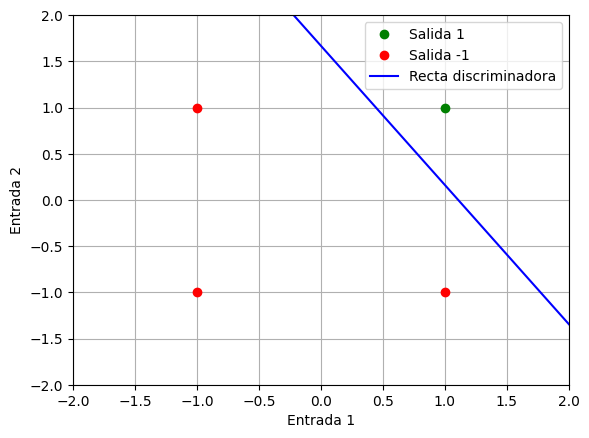

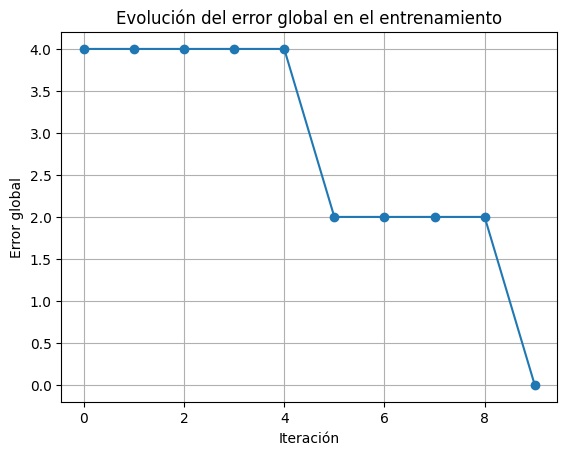

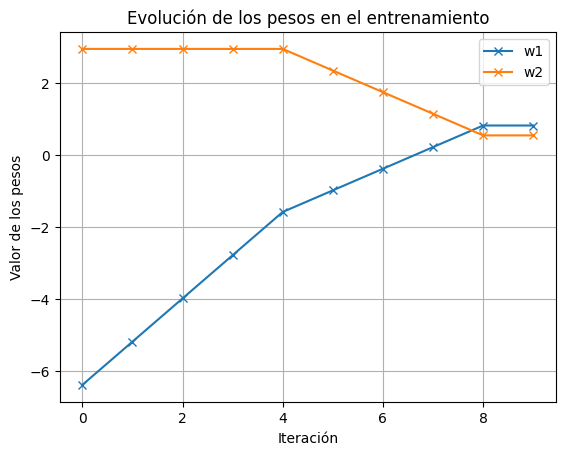

In [8]:
# AND de 2 entradas
w, w_0, hist_error, hist_w, it, solved = trainPerceptron(inputs2_AND, outputs2_AND, 0.3, 1000, 20)
linearSeparationPlot(inputs2_AND, outputs2_AND, w, w_0)
errorEvolutionPlot(hist_error)
weightsEvolutionPlot(hist_w)

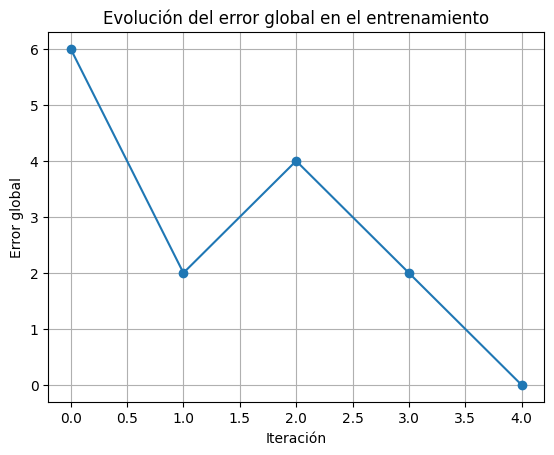

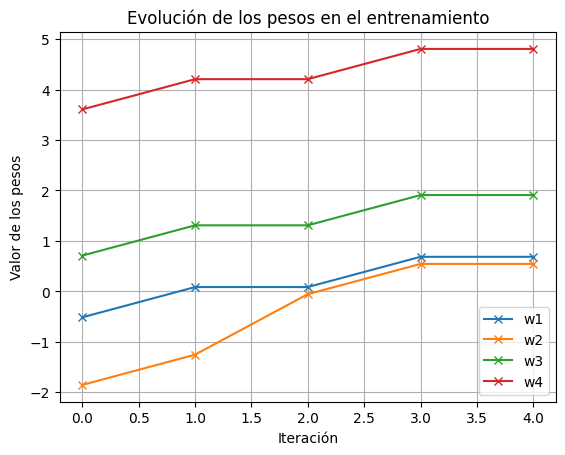

In [9]:
# AND de 4 entradas
w, w_0, hist_error, hist_w, it, solved = trainPerceptron(inputs4_AND, outputs4_AND, 0.3, 1000, 20)
errorEvolutionPlot(hist_error) 
weightsEvolutionPlot(hist_w)

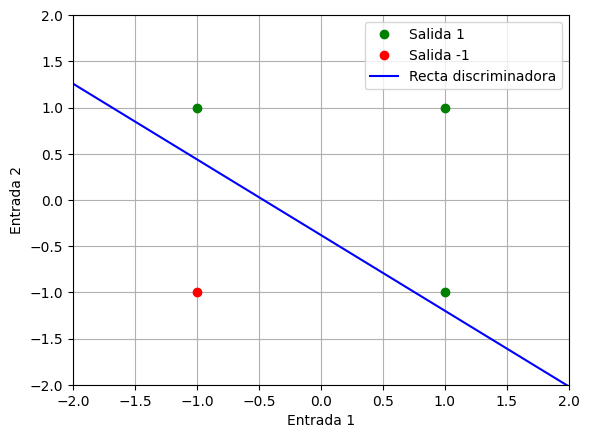

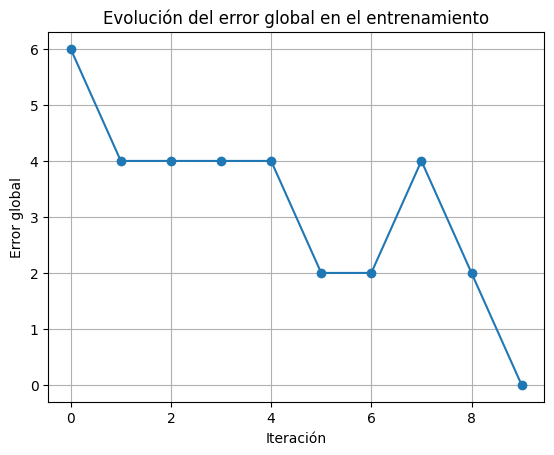

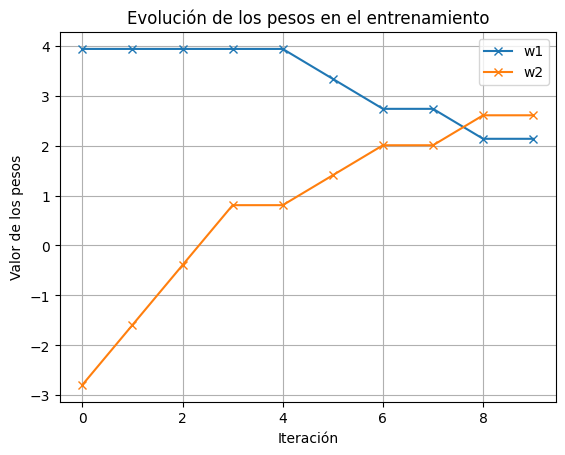

In [135]:
# OR de 2 entradas
w, w_0, hist_error, hist_w, it, solved = trainPerceptron(inputs2_OR, outputs2_OR, 0.3, 1000, 20)
linearSeparationPlot(inputs2_OR, outputs2_OR, w, w_0)
errorEvolutionPlot(hist_error)
weightsEvolutionPlot(hist_w)

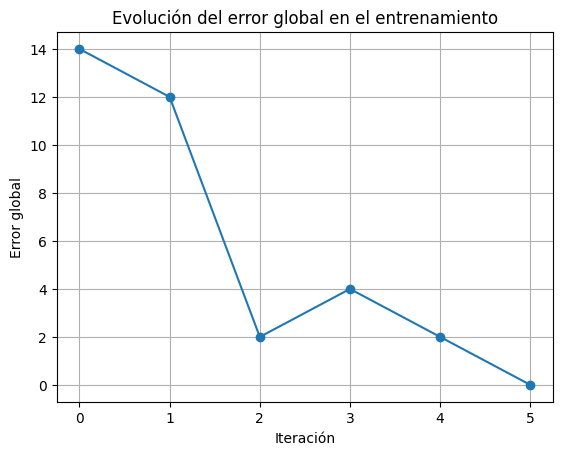

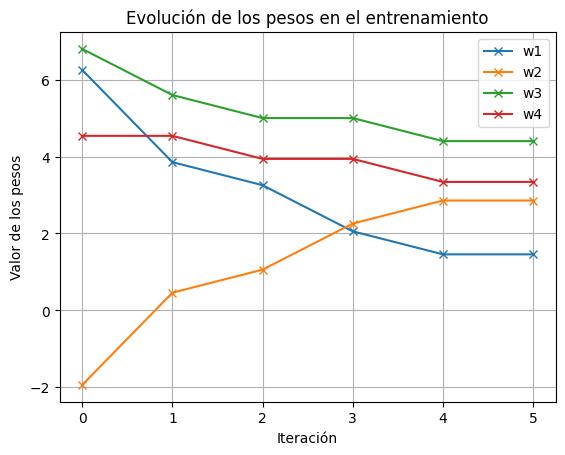

In [11]:
# OR de 4 entradas
w, w_0, hist_error, hist_w, it, solved = trainPerceptron(inputs4_OR, outputs4_OR, 0.3, 1000, 20)
errorEvolutionPlot(hist_error)
weightsEvolutionPlot(hist_w)

2. Determine numéricamente cómo varia la capacidad del perceptrón simple en función
del número de patrones enseñados. 

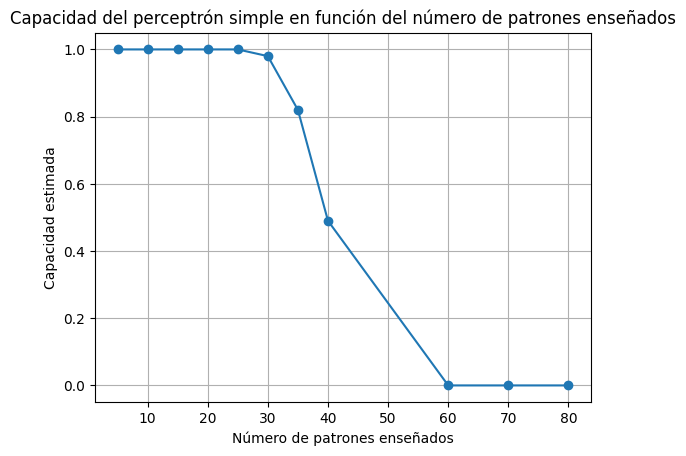

In [12]:
# CAPACIDAD DEL PERCEPTRON

perceptrons = 100 # Numero de entrenamientos
M = [5, 10, 15, 20, 25, 30, 35, 40, 60, 70, 80] # Dimension del problema
N = 20 # Cantidad de patrones
C = []

for m in M:
    solved_perceptrons = 0 # Numero de entrenamientos resueltos
    for _ in range(perceptrons):
        inputs = np.random.randn(m, N)
        outputs = np.random.randint(0, 2, m) * 2 - 1
        w, w_0, hist_error, hist_w, it, solved = trainPerceptron(inputs, outputs, 0.3, 1000, 10)
        if solved:
            solved_perceptrons += 1
    C.append(solved_perceptrons / perceptrons)

plt.figure()
plt.plot(M, C, '-o')
plt.xlabel('Número de patrones enseñados')
plt.ylabel('Capacidad estimada')
plt.title('Capacidad del perceptrón simple en función del número de patrones enseñados')
plt.grid(True)
plt.show()

3.
a) Implemente un perceptrón multicapa que aprenda la función lógica XOR de 2 y de
4 entradas (utilizando el algoritmo Backpropagation). 
b) Muestre cómo evoluciona el error durante el entrenamiento. 
c) Para una red entrenada en la función XOR de dos entradas, muestre cómo varía el
error en función del cambio en dos pesos de la red. De ejemplos de mínimos locales
y mesetas.
d) Idem (c) pero mostrando el error para cada patrón de entrada por separado.

In [13]:
# PERCEPTRON MULTICAPA - FUNCIONES

# Inicializar los pesos
def initWeights(layers, interval_width=1):
    weights = []
    for i in range(1, len(layers)):
        weight = np.random.uniform(-interval_width, interval_width, (layers[i-1] + 1, layers[i]))
        weights.append(weight)
    return weights

# Me deja elegir entre sigmoide y tanh
def activate(x, activation='tanh'):
    if activation == 'tanh':
        return np.tanh(x)
    elif activation == 'sigmoid':
        return 2 / (1 + np.exp(-x)) - 1

# Forward
def forwardPropagate(x, weights, activation='tanh'):
    activations = [np.concatenate(([1], x))]  # Agregar bias
    for w in weights:
        net_input = np.dot(activations[-1], w)
        activated = activate(net_input, activation)
        activations.append(np.concatenate(([1], activated)))  # Agregar bias
    return activations

# Me deja elegir entre la derivada de sigmoide y tanh
def activateDerivative(output, activation='tanh'):
    if activation == 'tanh':
        return 1 - np.tanh(output)**2
    elif activation == 'sigmoid':
        sigmoid_output = (output + 1) / 2  
        return 2 * sigmoid_output * (1 - sigmoid_output)

# Backpropagation
def backPropagate(activations, target, weights, learning_rate, activation='tanh'):
    error = target - activations[-1][1:]  # Quitar el bias en la salida
    deltas = [error * activateDerivative(activations[-1][1:], activation)]

    for i in range(len(activations) - 2, 0, -1):
        delta = np.dot(deltas[0], weights[i][1:].T) * activateDerivative(activations[i][1:], activation)
        deltas.insert(0, delta)

    # Actualización de pesos
    for i in range(len(weights)):
        layer = np.atleast_2d(activations[i])
        delta = np.atleast_2d(deltas[i])
        weights[i] += learning_rate * np.dot(layer.T, delta)

    return weights, error

# Entrenamiento de red multicapa
def trainNetwork(inputs, outputs, layers, learning_rate=0.3, max_iterations=1000, error_threshold=1e-6, activation='tanh'):
    weights = initWeights(layers)
    error_history = []  # Lista para guardar el error de cada iteracion

    for iteration in range(max_iterations):
        total_error = 0
        for x, y in zip(inputs, outputs):
            activations = forwardPropagate(x, weights, activation)
            weights, error = backPropagate(activations, y, weights, learning_rate, activation)
            total_error += np.mean(np.abs(error))
        
        mean_error = total_error / len(inputs)
        error_history.append(mean_error)  # Agregar el error promedio de la iteracion
        
        if mean_error < error_threshold:
            break  # Detener si el error es menor que el umbral

    return weights, error_history

def plotError(error_history, inputs):
    plt.figure(figsize=(10, 6))
    plt.plot(error_history, label='Error por Iteración')
    plt.xlabel('Iteraciones')
    plt.ylabel('Error Promedio')
    final_error = f"{error_history[-1]:.4f}"
    plt.title(f'Evolución del Error Durante el Entrenamiento para XOR de {inputs} entradas. Error final: {final_error}')
    plt.legend()
    plt.grid(True)
    plt.show()

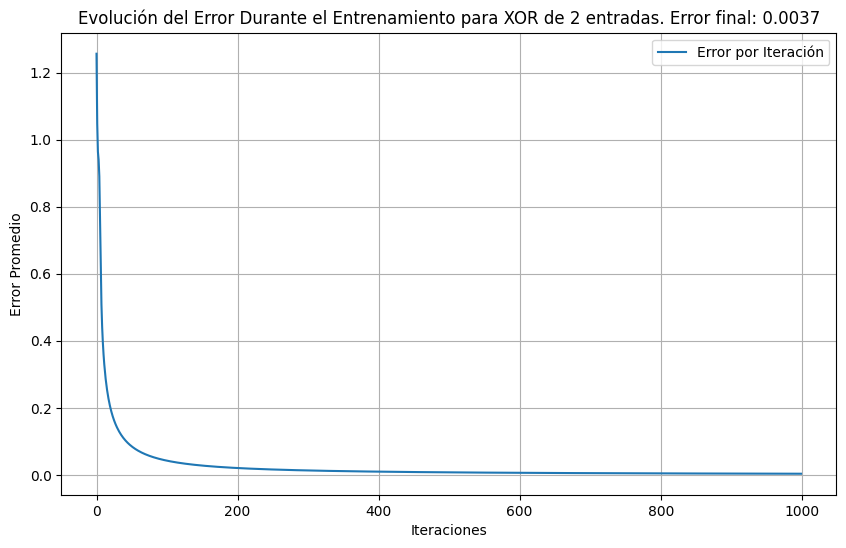

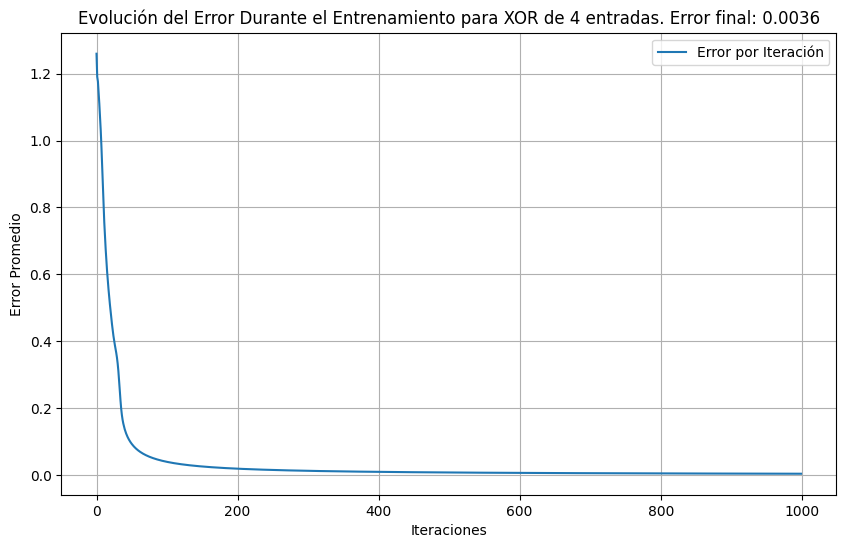

In [14]:
# PERCEPTRON MULTICAPA
# Entrenamiento para XOR de 2 entradas
layers2_XOR = [2, 5, 1]  # Dos neuronas de entrada, una capa oculta con cinco neuronas, y una neurona de salida
weights2_XOR, error_history2_XOR = trainNetwork(inputs2_XOR, outputs2_XOR, layers2_XOR, learning_rate=0.2, max_iterations=1000, error_threshold=1e-6)
plotError(error_history2_XOR, 2)
# Entrenamiento para XOR de 4 entradas
layers4_XOR = [4, 10, 1]  # Cuatro neuronas de entrada, una capa oculta con 10 neuronas, y una neurona de salida
weights4_XOR, error_history4_XOR = trainNetwork(inputs4_XOR, outputs4_XOR, layers4_XOR, learning_rate=0.1, max_iterations=1000, error_threshold=1e-6)
plotError(error_history4_XOR, 4)

In [15]:
# ERROR EN FUNCION DE DOS PESOS SINAPTICOS - FUNCIONES

# Calcula el ECM propagando hacia adelante
def calculateTotalError(inputs, desired_outputs, weights, activation='tanh'):
    total_error = 0
    for input, desired_output in zip(inputs, desired_outputs):
        activations = forwardPropagate(input, weights, activation)
        output = activations[-1][1:]  # Quitar el bias
        error = desired_output - output
        total_error += np.sum(error**2) / 2
    return total_error

# Genera mapa de error al cambiar los w elegidos
def generateErrorMap(inputs, outputs, weights, w1_layer_index, w1_neuron_index, w2_layer_index, w2_neuron_index, delta_range):
    error_map = np.zeros((len(delta_range), len(delta_range)))
    w1_original = weights[w1_layer_index][w1_neuron_index]
    w2_original = weights[w2_layer_index][w2_neuron_index]

    for i, delta_w1 in enumerate(delta_range):
        for j, delta_w2 in enumerate(delta_range):
            weights[w1_layer_index][w1_neuron_index] = w1_original + delta_w1
            weights[w2_layer_index][w2_neuron_index] = w2_original + delta_w2

            error_map[i, j] = calculateTotalError(inputs, outputs, weights)

            weights[w1_layer_index][w1_neuron_index] = w1_original
            weights[w2_layer_index][w2_neuron_index] = w2_original

    return delta_range, delta_range, error_map

# Calcula el error por patron
def calculateErrorsByPattern(inputs, desired_outputs, weights, activation='tanh'):
    errors_by_pattern = []
    for input, desired_output in zip(inputs, desired_outputs):
        activations = forwardPropagate(input, weights, activation)
        output = activations[-1][1:]  
        error = desired_output - output
        errors_by_pattern.append(np.sum(error**2))
    return errors_by_pattern


# Genera mapa de error por patron
def generateErrorMapsByPattern(inputs, outputs, weights, w1_layer_index, w1_neuron_index, w2_layer_index, w2_neuron_index, delta_range):
    num_patterns = len(inputs)
    error_maps = np.zeros((len(delta_range), len(delta_range), num_patterns))
    w1_original = weights[w1_layer_index][w1_neuron_index]
    w2_original = weights[w2_layer_index][w2_neuron_index]

    for i, delta_w1 in enumerate(delta_range):
        for j, delta_w2 in enumerate(delta_range):
            weights[w1_layer_index][w1_neuron_index] = w1_original + delta_w1
            weights[w2_layer_index][w2_neuron_index] = w2_original + delta_w2

            errors_by_pattern = calculateErrorsByPattern(inputs, outputs, weights)
            for k in range(num_patterns):
                error_maps[i, j, k] = errors_by_pattern[k]

            weights[w1_layer_index][w1_neuron_index] = w1_original
            weights[w2_layer_index][w2_neuron_index] = w2_original

    return delta_range, delta_range, error_maps

# Grafica mapas de error
def plotErrorMapsByPattern(delta_w1, delta_w2, error_maps):
    num_patterns = error_maps.shape[2]
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    for i in range(num_patterns):
        row = i // 2  
        col = i % 2   
        ax = axes[row, col]

        c = ax.pcolormesh(delta_w1, delta_w2, error_maps[:, :, i], shading='auto', cmap='viridis')
        fig.colorbar(c, ax=ax)
        ax.set_title(f'Patrón {i+1}')
        ax.set_xlabel('Delta W1')
        if col == 0:
            ax.set_ylabel('Delta W2')

    plt.suptitle("Mapa de Error por Patrón")
    plt.tight_layout()
    plt.show()

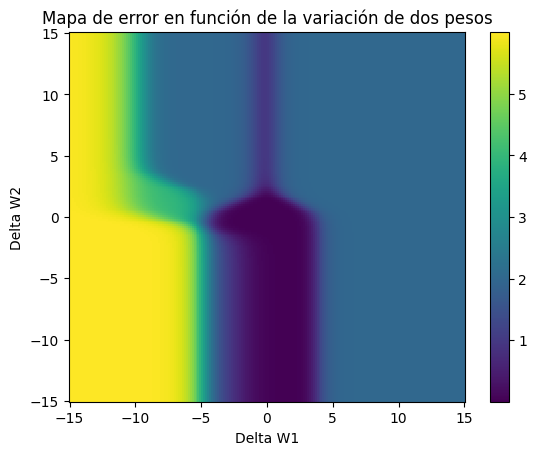

In [152]:
 #ERROR EN FUNCION DE DOS PESOS SINAPTICOS

weights_cpy = weights2_XOR
delta_range = np.linspace(-15, 15, 200) # Amplitud y paso de variacion

# Eleccion de los w a variar
w1_layer_index = 0  
w1_neuron_index = (0, 1)
w2_layer_index = 1 
w2_neuron_index = (1, 0)

W1_deltas, W2_deltas, error_map = generateErrorMap(inputs2_XOR, outputs2_XOR, weights_cpy, w1_layer_index, w1_neuron_index, w2_layer_index, w2_neuron_index, delta_range)

# Grafico de mapa de error
plt.figure()
plt.pcolormesh(W1_deltas, W2_deltas, error_map, cmap='viridis')
plt.colorbar()
plt.xlabel('Delta W1')
plt.ylabel('Delta W2')
plt.title('Mapa de error en función de la variación de dos pesos')
plt.show()

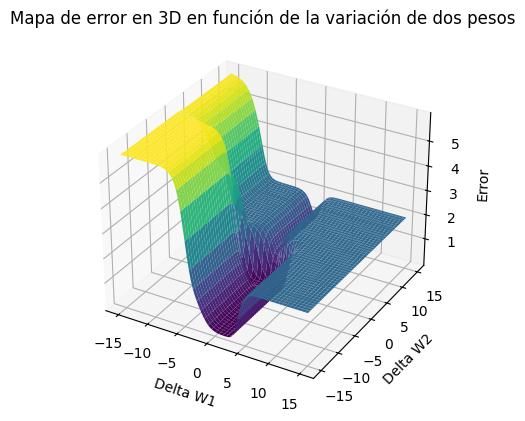

In [153]:
# ERROR EN 3D

from mpl_toolkits.mplot3d import Axes3D

W1_deltas, W2_deltas = np.meshgrid(delta_range, delta_range)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1_deltas, W2_deltas, error_map, cmap='viridis')
ax.set_xlabel('Delta W1')
ax.set_ylabel('Delta W2')
ax.set_zlabel('Error')
ax.set_title('Mapa de error en 3D en función de la variación de dos pesos')
plt.show()

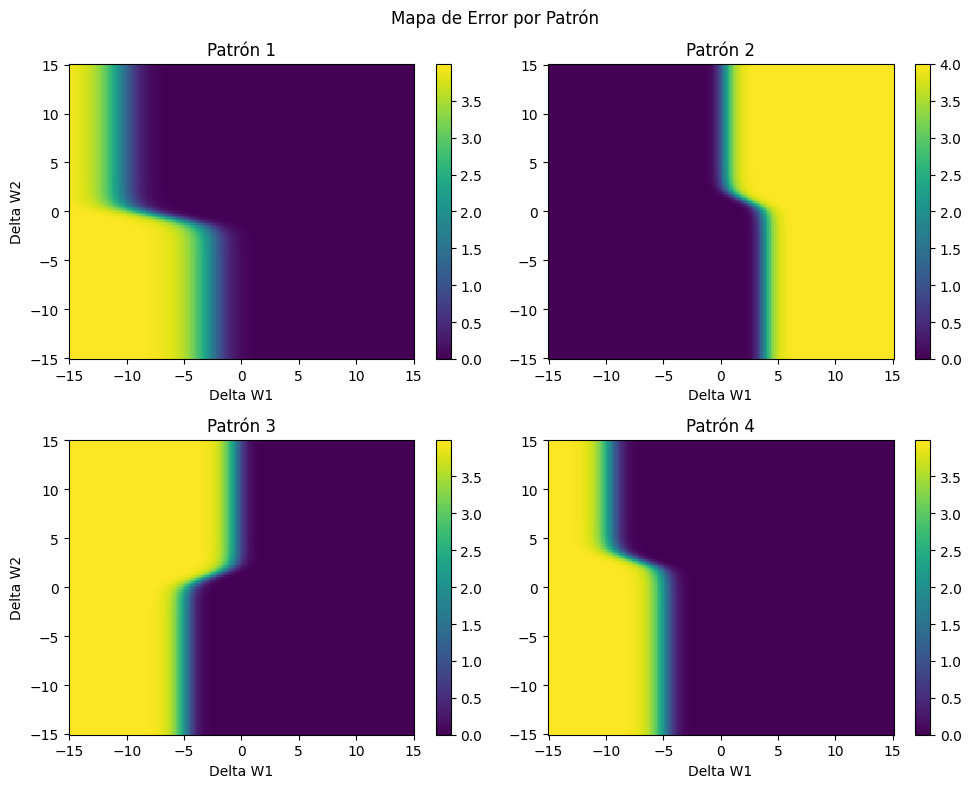

In [154]:
# ERROR POR PATRON

W1_deltas, W2_deltas, error_maps_by_pattern = generateErrorMapsByPattern(inputs2_XOR, outputs2_XOR, weights_cpy, w1_layer_index, w1_neuron_index, w2_layer_index, w2_neuron_index, delta_range)
plotErrorMapsByPattern(W1_deltas, W2_deltas, error_maps_by_pattern)

4.
a) Implemente una red con aprendizaje Backpropagation que aprenda la siguiente
función: 
f(x,y,z)=sin(x)+cos(y)+z
donde: x e y ∊ [0,2π] y z ∊[−1,1]. Para ello construya un conjunto de datos de
entrenamiento y un conjunto de evaluación. Muestre el error en función de las
épocas de entrenamiento.
b) Analice, mediante simulaciones, el efecto que tiene el tamaño de minibatch y la
constante de aprendizaje en el número número de iteraciones y el tiempo total de
entrenamiento necesario para obtener un buen desempeño de la red.

In [119]:
# APRENDIZAJE DE FUNCION - FUNCIONES

def generateFunctionSamples():
    x = np.random.uniform(0, 2 * np.pi)
    y = np.random.uniform(0, 2 * np.pi)
    z = np.random.uniform(-1, 1)
    return (x, y, z), (np.sin(x) + np.cos(y) + z) / 3

def generateData(num_samples):
    inputs = []
    outputs = []
    for _ in range(num_samples):
        input, output = generateFunctionSamples()
        inputs.append(input)
        outputs.append([output])
    return np.array(inputs), np.array(outputs)

def trainEpochWithBatches(inputs, outputs, weights, learning_rate=0.3, error_threshold=1e-6):
    total_error = 0

    for x, y in zip(inputs, outputs):
        activations = forwardPropagate(x, weights)
        weights, error = backPropagate(activations, y, weights, learning_rate)
        total_error += np.mean(np.abs(error))
    
        mean_error = total_error / len(inputs)
        
        if mean_error < error_threshold:
            break  # Detener si el error es menor que el umbral

    return weights, mean_error

In [131]:
# APRENDIZAJE DE FUNCION - PARAMETROS

batch_size = 200
num_batches = 6
num_training_samples = num_batches * batch_size
num_test_samples = int(0.3 * num_training_samples)
total_samples = num_training_samples + num_test_samples

inputs, outputs = generateData(total_samples)

train_inputs = inputs[:num_training_samples]
train_outputs = outputs[:num_training_samples]
test_inputs = inputs[num_training_samples:]
test_outputs = outputs[num_training_samples:]

layers = [3, 5, 1] 
learning_rate = 0.1
error_threashold = 0.001
weights = initWeights(layers, interval_width=0.1)

epochs = 10000
error_history = []

In [132]:
# APRENDIZAJE DE FUNCION - ENTRENAMIENTO

for _ in tqdm(range(epochs), desc="Performing epochs", unit="epochs"):
    training_random_indexes = np.random.permutation(num_training_samples)
    batches_indexes = np.array_split(training_random_indexes, num_batches)

    for batch in batches_indexes:
        input_batch = train_inputs[batch]
        output_batch = train_outputs[batch]

        weights, mean_error= trainEpochWithBatches(input_batch, output_batch, weights, learning_rate=learning_rate, error_threshold=error_threashold)
        
    error_history.append(mean_error)

Performing epochs: 100%|██████████| 10000/10000 [00:07<00:00, 1406.07epochs/s]


ECM: 0.0031


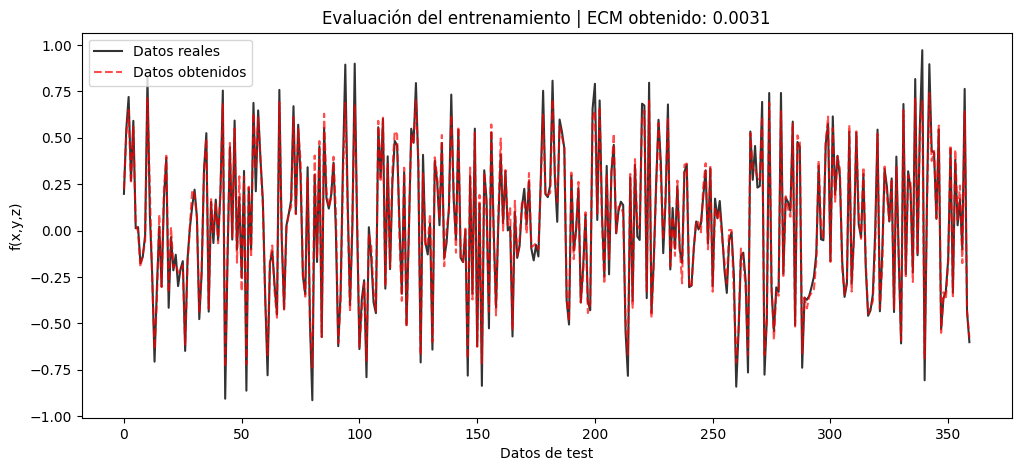

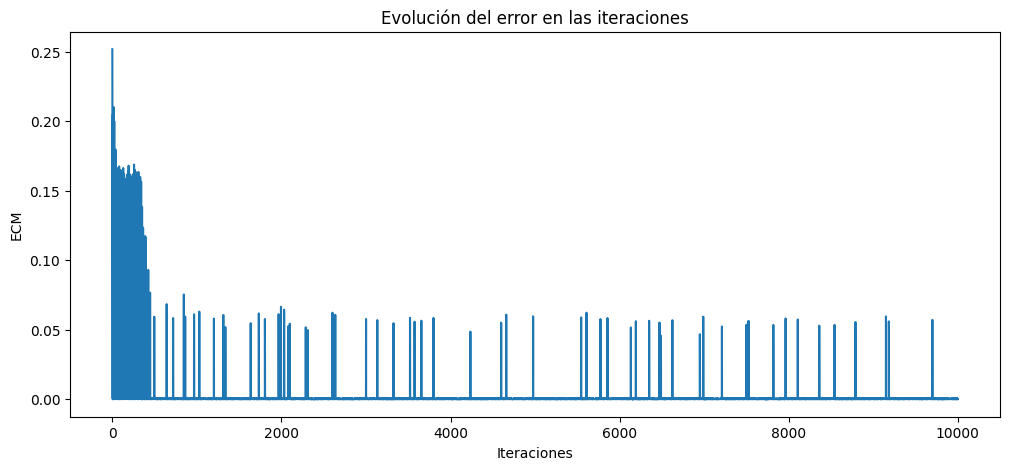

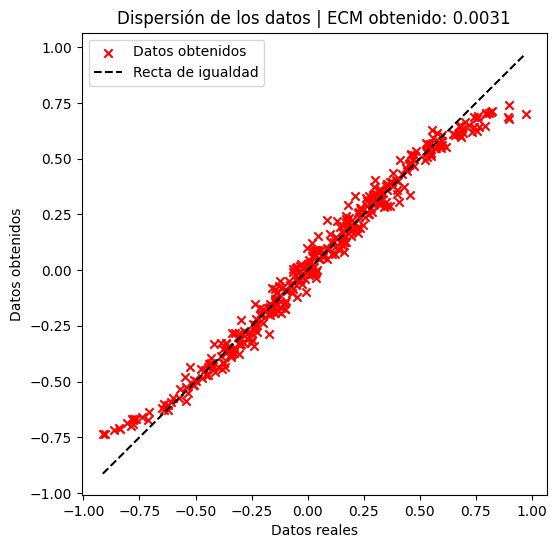

In [155]:
# APRENDIZAJE DE FUNCION - GRAFICOS

test_predictions = []
for x in test_inputs:
    activations = forwardPropagate(x, weights)
    prediction = activations[-1][1]  
    test_predictions.append(prediction)

test_predictions = np.array(test_predictions).flatten()

mse = np.mean((test_predictions - test_outputs.flatten()) ** 2)
print(f'ECM: {mse:.4f}')

# Grafico comparativo
plt.figure(figsize=(12, 5))
plt.plot(test_outputs.flatten(), color='black', alpha=0.8, label='Datos reales')
plt.plot(test_predictions, '--', color='red', alpha=0.7, label='Datos obtenidos')
plt.legend()
plt.xlabel('Datos de test')
plt.ylabel('f(x,y,z)')
plt.title(f'Evaluación del entrenamiento | ECM obtenido: {mse:.4f}')
plt.show()

# Error
plt.figure(figsize=(12, 5))
plt.plot(error_history)
plt.xlabel('Iteraciones')
plt.ylabel('ECM')
plt.title('Evolución del error en las iteraciones')
plt.show()

# Grafico comparativo
plt.figure(figsize=(6, 6))
plt.scatter(test_outputs.flatten(), test_predictions, color='red', marker='x', label='Datos obtenidos')
plt.plot([test_outputs.flatten().min(), test_outputs.flatten().max()], [test_outputs.flatten().min(), test_outputs.flatten().max()], 'k--', label='Recta de igualdad')
plt.title(f'Dispersión de los datos | ECM obtenido: {mse:.4f}')
plt.xlabel('Datos reales')
plt.ylabel('Datos obtenidos')
plt.legend()
plt.show()


In [156]:
# APRENDIZAJE DE FUNCION - ANALISIS DE DIFERENTES PARAMETROS

# Parametros de simulacion
batch_sizes = [1, 5, 10, 20, 50, 200, 500]
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
epochs = 100 
inputs, outputs = generateData(10000)
layers = [3, 5, 1]
weights = initWeights(layers, interval_width=0.1)
results = []

# Simulacion de entrenamiento
for batch_size in batch_sizes:
    for lr in learning_rates:
        current_weights = [np.copy(w) for w in weights]
        
        start_time = time.time()
        error_history = [] 

        for _ in tqdm(range(epochs), desc=f"Training with batch size {batch_size} and lr {lr}"):
            training_random_indexes = np.random.permutation(len(inputs))
            batches_indexes = np.array_split(training_random_indexes, np.ceil(len(inputs) / batch_size))

            for batch in batches_indexes:
                input_batch = inputs[batch]
                output_batch = outputs[batch]

                current_weights, mean_error = trainEpochWithBatches(input_batch, output_batch, current_weights, learning_rate=lr, error_threshold=0.01)
                error_history.append(mean_error) 

        training_time = time.time() - start_time

        results.append({
            'Batch Size': batch_size,
            'Learning Rate': lr,
            'Training Time': training_time,
            'Final Mean Error': np.mean(error_history)
        })

Training with batch size 500 and lr 1: 100%|██████████| 100/100 [00:00<00:00, 1211.94it/s]


MSE Results:
 [[2.12348992e-01 1.16330287e-01 7.61530031e-02 6.62092069e-02
  6.87090229e-01]
 [1.93379838e-01 1.04003301e-01 5.84435925e-02 3.73908246e-02
  6.69732417e-01]
 [1.71134475e-01 9.18380023e-02 5.95354561e-02 2.62663591e-02
  6.45918790e-01]
 [1.32128411e-01 6.39239411e-02 4.07671696e-02 1.70875574e-02
  5.95040207e-01]
 [3.98982514e-02 1.47614524e-02 6.93258936e-03 6.46723032e-03
  4.33612354e-01]
 [1.61329255e-03 1.48544172e-03 1.24588505e-03 1.17595462e-03
  3.43097742e-03]
 [6.53355195e-04 6.16366685e-04 5.34826143e-04 4.98884507e-04
  1.41704915e-03]]
Training Time Results:
 [[27.31006026 27.37560868 26.62069464 26.247715   27.65621305]
 [21.16656303 18.9519453  16.88660479 14.10991883 24.21665883]
 [18.4827342  15.13583541 12.65992641  7.55075359 23.54823565]
 [14.08286715  9.56272888  7.03513312  3.68466616 20.75848651]
 [ 3.55620623  1.57026649  1.01736474  0.97830629 15.07628608]
 [ 0.17682934  0.20403481  0.16879582  0.16303706  0.16351914]
 [ 0.08552456  0.081519

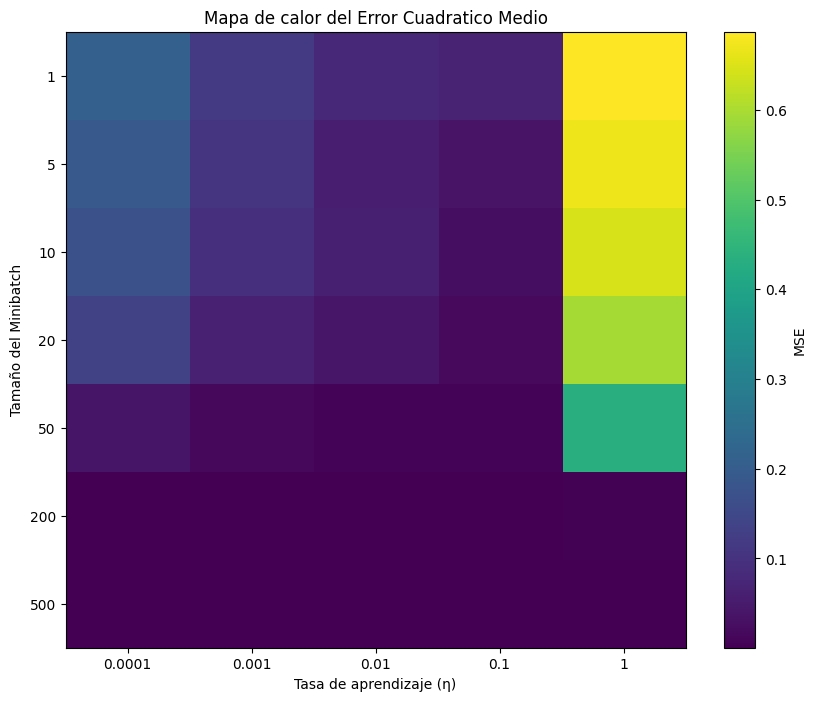

MSE min: 0.0004988845070044045
MSE max: 0.687090228783591


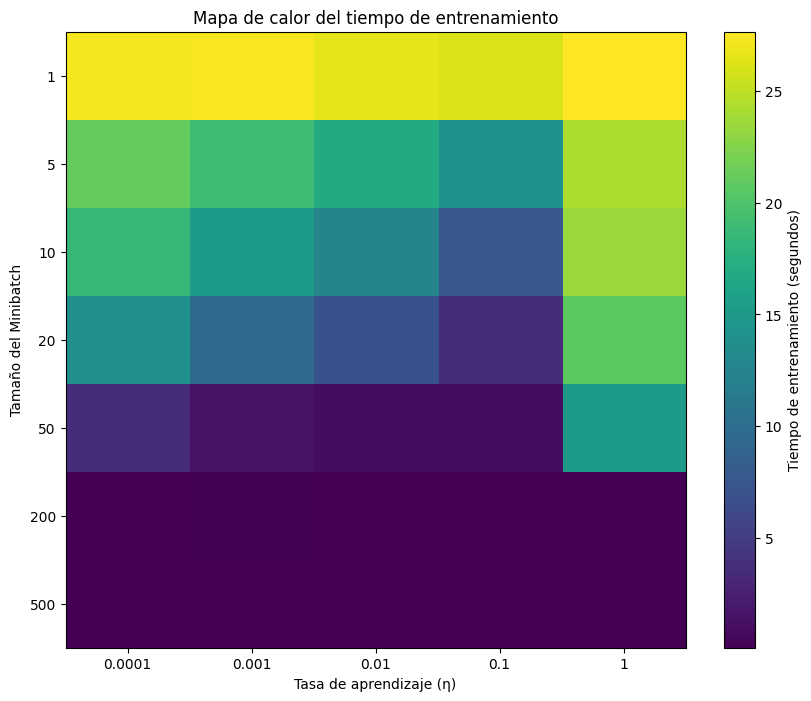

In [157]:
# APRENDIZAJE DE FUNCION - ANALISIS DE DIFERENTES PARAMETROS - GRAFICOS

mse_results = np.zeros((len(batch_sizes), len(learning_rates)))
time_results = np.zeros((len(batch_sizes), len(learning_rates)))

batch_index_map = {size: idx for idx, size in enumerate(batch_sizes)}
rate_index_map = {rate: idx for idx, rate in enumerate(learning_rates)}

for result in results:
    batch_idx = batch_index_map[result['Batch Size']]
    rate_idx = rate_index_map[result['Learning Rate']]
    mse_results[batch_idx, rate_idx] = result['Final Mean Error']
    time_results[batch_idx, rate_idx] = result['Training Time']

print("MSE Results:\n", mse_results)
print("Training Time Results:\n", time_results)

mse_matrix = np.array(mse_results).reshape(len(batch_sizes), len(learning_rates))
time_matrix = np.array(time_results).reshape(len(batch_sizes), len(learning_rates))

# Mapa de calor para MSE
plt.figure(figsize=(10, 8))
plt.imshow(mse_matrix, interpolation='nearest', cmap='viridis', aspect='auto')
plt.colorbar(label='MSE', format='%0.1f')
plt.title("Mapa de calor del Error Cuadratico Medio")
plt.ylabel("Tamaño del Minibatch")
plt.xlabel("Tasa de aprendizaje (η)")
plt.xticks(range(len(learning_rates)), labels=[str(lr) for lr in learning_rates])
plt.yticks(range(len(batch_sizes)), labels=[str(bs) for bs in batch_sizes])
plt.show()

print("MSE min:", mse_matrix.min())
print("MSE max:", mse_matrix.max())

# Mapa de calor para Tiempo de Entrenamiento
plt.figure(figsize=(10, 8))
plt.imshow(time_matrix, interpolation='nearest', cmap='viridis', aspect='auto')
plt.colorbar(label='Tiempo de entrenamiento (segundos)')
plt.title("Mapa de calor del tiempo de entrenamiento")
plt.ylabel("Tamaño del Minibatch")
plt.xlabel("Tasa de aprendizaje (η)")
plt.xticks(range(len(learning_rates)), labels=[str(lr) for lr in learning_rates])
plt.yticks(range(len(batch_sizes)), labels=[str(bs) for bs in batch_sizes])
plt.show()

6.
a) Encontrar un perceptrón multicapa que resuelva una XOR de 2 entradas con un
algoritmo genético. Graficar el fitness a lo largo del proceso de evolución.
b) ¿Cómo impacta en el aprendizaje la constante de mutación, la probabilidad de
cross-over y el tamaño de la población?

In [158]:
# ALGORITMO GENETICO - FUNCIONES

# Inicializa la poblacion
def initPopulation(pop_size, layer_sizes):
    population = []
    for _ in range(pop_size):
        individual = {
            'weights': initWeights(layer_sizes)
        }
        population.append(individual)
    return population

# Calcula el error al hacer el paso forward
def calculateNetworkError(network, inputs, desired_outputs, activation='tanh'): #BIEN
    total_error = 0
    for x, y in zip(inputs, desired_outputs):
        activations = forwardPropagate(x, network['weights'], activation)
        output = activations[-1][1:]  # Saco el bias
        total_error += np.mean((output - y) ** 2)
    return total_error / len(inputs)

# Calcula los fitness
def calculateFitness(population, inputs, outputs, activation='tanh'):
    errors = [calculateNetworkError(ind, inputs, outputs, activation) for ind in population]
    max_error = max(errors)
    fitness_scores = [(max_error - error) / max_error for error in errors]

    return fitness_scores

# Seleccion de la poblacion
def selectionByProbability(population, fitness_scores):
    # Me aseguro de tener al individuo elite en mi seleccion
    selected_population = [population[np.argmax(fitness_scores)]]

    # Calculo probabilidades de seleccion de cada individuo a partir de sus fitness.
    total_fitness = sum(fitness_scores)
    epsilon = 1e-10
    selection_probabilities = [max(fitness / total_fitness, epsilon) for fitness in fitness_scores]

    # Selecciona el resto de la población nueva evaluando cada individuo independientemente
    while len(selected_population) < len(population):
        for index, individual in enumerate(population):
            random_chance = np.random.random() * sum(selection_probabilities) # Genera un numero aleatorio entre 0 y sum(selection_probabilities)
            if random_chance > selection_probabilities[index]:
                selected_population.append(individual)
                if len(selected_population) == len(population):
                    break

    return selected_population

# Crossover
def crossover(population, fitness_scores, crossover_rate=0.7):
    new_population = [population[np.argmax(fitness_scores)]]
    for i in range(0, len(population), 2):
        parent1 = population[i]
        if i + 1 < len(population):
            parent2 = population[i + 1]
            if np.random.rand() < crossover_rate:
                child1, child2 = {}, {}
                child1['weights'], child2['weights'] = [], []
                for w1, w2 in zip(parent1['weights'], parent2['weights']):
                    mix = np.random.rand()
                    child1['weights'].append(mix * w1 + (1 - mix) * w2)
                    child2['weights'].append((1 - mix) * w1 + mix * w2)
                new_population.extend([child1, child2])
            else:
                new_population.extend([parent1, parent2])
        else:
            new_population.append(parent1)
    return new_population

# Mutacion
def mutate(weights, mutation_rate=0.1, mutation_amount=0.5):
    for i in range(len(weights)):
        if np.random.rand() < mutation_rate:
            mutation = np.random.randn(*weights[i].shape) * mutation_amount
            weights[i] += mutation
    return weights

Generación 0, Mejor fitness: 0.6820575715913745
Generación 1, Mejor fitness: 0.6755390958240072
Generación 2, Mejor fitness: 0.6556684408940977
Generación 3, Mejor fitness: 0.6625454414374713
Generación 4, Mejor fitness: 0.6721404203952054
Generación 5, Mejor fitness: 0.6715772038974657
Generación 6, Mejor fitness: 0.6362768040076802
Generación 7, Mejor fitness: 0.6466415856566806
Generación 8, Mejor fitness: 0.6008839787812651
Generación 9, Mejor fitness: 0.7356065796308168
Generación 10, Mejor fitness: 0.7740616644859686
Generación 11, Mejor fitness: 0.7734580854453263
Generación 12, Mejor fitness: 0.762275679413574
Generación 13, Mejor fitness: 0.8691605673316992
Generación 14, Mejor fitness: 0.9091887205748375
Generación 15, Mejor fitness: 0.9203161458142448
Generación 16, Mejor fitness: 0.9078497144580497
Generación 17, Mejor fitness: 0.9125597667221211
Generación 18, Mejor fitness: 0.9143831674193762
Generación 19, Mejor fitness: 0.9278637642312643
Generación 20, Mejor fitness: 0

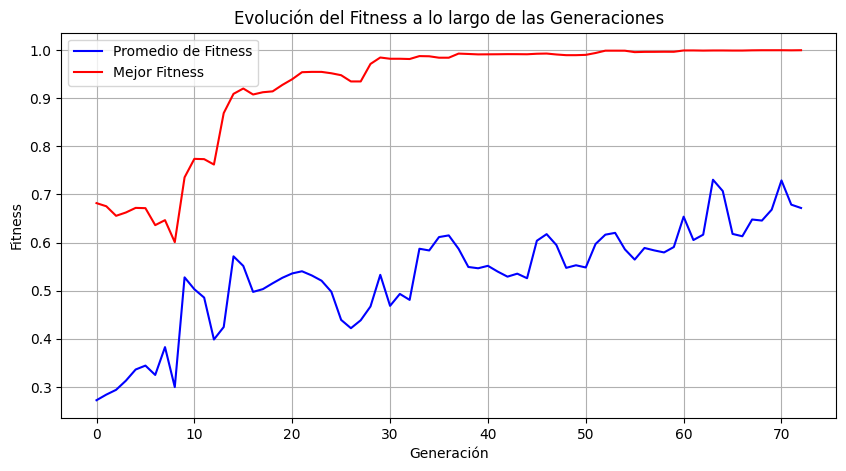

In [159]:
# ALGORITMO GENETICO

# Parametros de la red
num_inputs = 2
num_outputs = 1
hidden_layers = [5]
# Parametros de la poblacion
pop_size = 50
max_generations = 2000
layer_sizes = [num_inputs] + hidden_layers + [num_outputs]
population = initPopulation(pop_size, layer_sizes)

fitness_averages = []
best_fitnesses = []

# Bucle de entrenamiento
for generation in range(max_generations):
    # Calculo fitness
    fitness_scores = calculateFitness(population, inputs2_XOR, outputs2_XOR)
    # Guardo el promedio y el mejor fitness
    fitness_averages.append(np.mean(fitness_scores))
    best_fitnesses.append(max(fitness_scores))
    # Condicion de corte
    if max(fitness_scores) > 0.9999:
        print(f"Se encontro una solucion optima en la generacion {generation}, con el individuo {np.argmax(fitness_scores)}\n")
        if np.mean(fitness_scores) > 0.9:
            print(f"Todos los individuos en la generacion {generation}, tienen un buen fitness\n")
            break
        break # Comentando esta linea se corta si o si por promedio
    print(f"Generación {generation}, Mejor fitness: {max(fitness_scores)}")
    # Seleccion
    selected_population = selectionByProbability(population, fitness_scores)
    # Crossover
    population = crossover(selected_population, fitness_scores)
    # Mutacion
    for individual in population:
        individual['weights'] = mutate(individual['weights'])

fitness_scores = calculateFitness(population, inputs2_XOR, outputs2_XOR)
best_individual = population[np.argmax(fitness_scores)]
best_fitness = max(fitness_scores)
print(f"Mejor fitness final: {best_fitness}")

# Grafico el fitness
plt.figure(figsize=(10, 5))
plt.plot(fitness_averages, label='Promedio de Fitness', color='blue')
plt.plot(best_fitnesses, label='Mejor Fitness', color='red')
plt.title('Evolución del Fitness a lo largo de las Generaciones')
plt.xlabel('Generación')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.show()